Karol Gutiérrez A01024536

# Calculate the convolution mask for a Gaussian Variance Filter, $\sigma^2 = 1$

First we import the dependencies as usual

In [1]:
import pprint
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Since the variance is 1, then the value of c is as follows:

In [2]:
variance = 1
c = 2 * (2 * variance ** 2)**0.5
c

2.8284271247461903

If we want $w$ integer with $w \geq 3c$ then $w = 9$

In [3]:
w = int(np.ceil(3*c))
w

9

Then we define the formula for the gaussian mask given its size and variance

In [4]:
def gauss2D(w,variance):
    shape = (w, w)
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*variance) )
    h = h/(2 * np.pi * variance)**0.5
    return h

In [5]:
gaussian_mask = gauss2D(w, 1.0)

In [6]:
np.set_printoptions(suppress=True)
print(gaussian_mask)

[[0.00000004 0.00000149 0.00001811 0.00008117 0.00013383 0.00008117
  0.00001811 0.00000149 0.00000004]
 [0.00000149 0.00004923 0.00059979 0.00268805 0.00443185 0.00268805
  0.00059979 0.00004923 0.00000149]
 [0.00001811 0.00059979 0.00730688 0.03274718 0.05399097 0.03274718
  0.00730688 0.00059979 0.00001811]
 [0.00008117 0.00268805 0.03274718 0.14676266 0.24197072 0.14676266
  0.03274718 0.00268805 0.00008117]
 [0.00013383 0.00443185 0.05399097 0.24197072 0.39894228 0.24197072
  0.05399097 0.00443185 0.00013383]
 [0.00008117 0.00268805 0.03274718 0.14676266 0.24197072 0.14676266
  0.03274718 0.00268805 0.00008117]
 [0.00001811 0.00059979 0.00730688 0.03274718 0.05399097 0.03274718
  0.00730688 0.00059979 0.00001811]
 [0.00000149 0.00004923 0.00059979 0.00268805 0.00443185 0.00268805
  0.00059979 0.00004923 0.00000149]
 [0.00000004 0.00000149 0.00001811 0.00008117 0.00013383 0.00008117
  0.00001811 0.00000149 0.00000004]]


Now let's apply the filter to an image: 

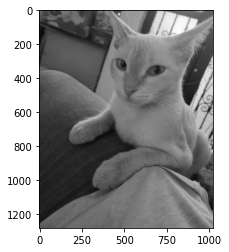

In [7]:
img = cv2.imread("media/cat.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

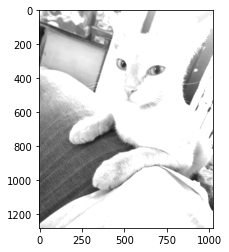

In [8]:
filtered = cv2.filter2D(img, -1, gaussian_mask)
plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

# Display the Gaussian filter convolution mask in the frequency spectrum

Here we compare the Fourier Transform of the original image and the image that passed through the Gaussian filter

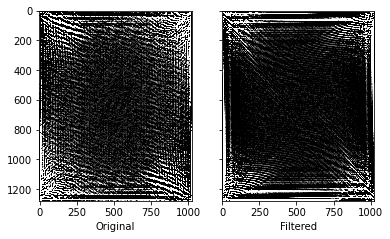

In [9]:
# Fast Fourier transform
ft_original = np.fft.fft2(img)
ft_filtered = np.fft.fft2(filtered)


fig, ax = plt.subplots(1, 2, sharex='col', sharey='row')

ax[0].set_xlabel('Original')
freq_original = np.real(ft_original)
ax[0].imshow(freq_original, cmap='gray', vmin=0, vmax=255)

ax[1].set_xlabel('Filtered')
freq_filtered = np.real(ft_filtered)
ax[1].imshow(freq_filtered, cmap='gray', vmin=0, vmax=255)

plt.show()

# Make a script that receives images, video, or streaming from a camera and does the following: 

## Have an option to display the histogram (grayscale and/or "n" layers in a color model).

Here is the original image:

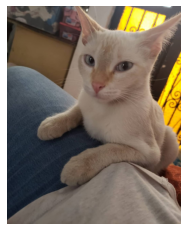

In [10]:
plt.axis("off")
img = cv2.imread("media/cat.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Here is the histogram of the image taking RGB.

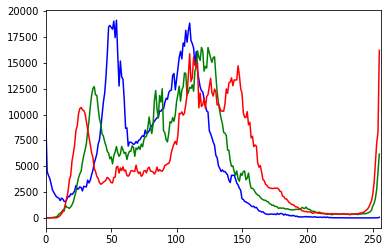

In [11]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Here is the histogram in general, i.e. grayscale 

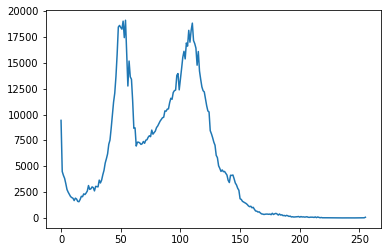

In [12]:
hist = cv2.calcHist([img],[0],None,[256],[0,256]) 
plt.plot(hist) 
plt.show()

## Get the binary representation of the input data

Here is an implementation using Otsu Algorithm

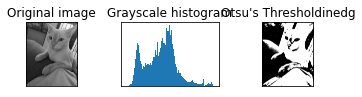

In [13]:
img = cv2.imread("media/cat.jpeg",  cv2.IMREAD_GRAYSCALE)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
otsu = [img, 0, th2]
title= ['Original image','Grayscale histogram',"Otsu's Thresholdinedg"]
plt.subplot(3,3,1),plt.imshow(otsu[0],'gray')
plt.title(title[0]), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.hist(otsu[0].ravel(),256)
plt.title(title[1]), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(otsu[2],'gray')
plt.title(title[2]), plt.xticks([]), plt.yticks([])
plt.show()

## Video

The original video is here: https://youtu.be/zaMZZ77nafg

In the next lines of codes we will apply Otsu's binarization to each frame in the video to create a new one.

In [18]:
video = cv2.VideoCapture('media/cars.mp4')

frame_width = int(video.get(3)) 
frame_height = int(video.get(4)) 
   
size = (frame_width, frame_height) 

In [19]:
result = cv2.VideoWriter('cars_otsu.avi', cv2.VideoWriter_fourcc(*'MJPG'), 30, size)

In [20]:
while(True): 
    ret, frame = video.read() 
    if ret == True:  
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        ret2, img_back = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        img_back = np.floor(img_back).astype('uint8')
        bb = cv2.cvtColor(img_back,cv2.COLOR_GRAY2RGB)
        result.write(bb) 
    else: 
        break  
video.release()
result.release() 

print("The video was successfully saved") 

The video was successfully saved


Here you can see the final result: https://youtu.be/A4-BXLoZSDo